# Resultados da busca em grade utilizando todos os parâmetros do dataset

**MLP**
- Paciência: $25$ e $50$
- batch_size: $16$ e $32$
- $\beta_1$: $1$, $0.9$, $0.8$ 
- $\beta_2$: $0.999$, $0.95$, $0.9$
- Épocas: $300$ e $500$
- Função de ativação: $relu, sigmoide$

***Obs:*** *Observamos que todos os resultados utilizando sigmoide apresentaram um desempenho extremamente baixo para prever quando o paciente realmente possui a síndrome dos ovários policístico. Por isso, nos resultados da busca em grade em que aparece "logistic", mudamos para "relu"*

In [1]:
import pandas as pd
import numpy as np
from utilities.show_results import plot_confusion_matrix, get_accuracy, get_precision, f_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from joblib import dump, load

## Carregando os datasets
Abrindo:
1. Dataset contendo os resultados da busca em grade utilizando todos os atributos (grid)
2. Dataset contendo todos os atributos (42 no total)

In [2]:
grid = pd.read_csv('output/PCOS_45_attr.csv')
data = pd.read_csv('PCOS.csv')

In [3]:
grid.sort_values(by='rank_test_score', inplace=True)

In [4]:
grid.head(2)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_batch_size,param_beta_1,param_beta_2,param_hidden_layer_sizes,...,param_verbose,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2830,2830,3.715950,0.006767,0.000912,0.000011,logistic,16,0.9,0.9,"(4, 16)",...,False,"{'activation': 'logistic', 'batch_size': 16, '...",0.921053,0.92,0.946667,0.96,0.893333,0.928211,0.023179,1
3200,3200,2.281947,0.022440,0.000944,0.000016,logistic,16,0.8,0.9,"(7, 13)",...,False,"{'activation': 'logistic', 'batch_size': 16, '...",0.907895,0.92,0.933333,0.96,0.906667,0.925579,0.019731,2


## Separando os atributos preditores do atributo alvo

In [5]:
X = data.drop(columns=['PCOS (Y/N)'], axis=1)
y = data["PCOS (Y/N)"]

## Separando o conjunto de teste e treino

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)

X_train.shape, X_test.shape, (y_test == 1).sum(), (y_test == 0).sum()

((376, 42), (162, 42), 45, 117)

In [7]:
X_train_norm = (X_train - np.min(X_train))/(np.max(X_train) - np.min(X_train))

X_test_norm = (X_test - np.min(X_train))/(np.max(X_train) - np.min(X_train))

C:\Users\Callidus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Callidus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


## Carregando e treinando os três melhores conjuntos de hipeparâmetros da busca em grade

In [8]:
grid["params"].iloc[0]

"{'activation': 'logistic', 'batch_size': 16, 'beta_1': 0.9, 'beta_2': 0.9, 'hidden_layer_sizes': (4, 16), 'max_iter': 500, 'n_iter_no_change': 25, 'solver': 'adam', 'verbose': False}"

ACURÁCIA: 0.8951
PRECISÃO: 0.8951


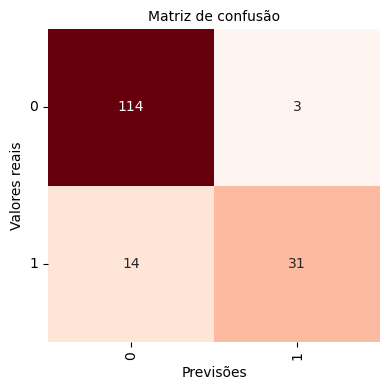

In [9]:
mlp_1 = MLPClassifier(
    verbose= False,
    max_iter=500, 
    activation='relu', 
    hidden_layer_sizes=(4,16),
    batch_size=16,
    beta_1=0.9,
    beta_2=0.9,
    solver='adam',
    early_stopping=True,
    n_iter_no_change=25
)
mlp_1.fit(X_train_norm.values, y_train)

y_pred = mlp_1.predict(X_test_norm.values)
get_accuracy(y_test, y_pred)
get_precision(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [10]:
grid["params"].iloc[1]

"{'activation': 'logistic', 'batch_size': 16, 'beta_1': 0.8, 'beta_2': 0.9, 'hidden_layer_sizes': (7, 13), 'max_iter': 300, 'n_iter_no_change': 25, 'solver': 'adam', 'verbose': False}"

ACURÁCIA: 0.8333
PRECISÃO: 0.8333


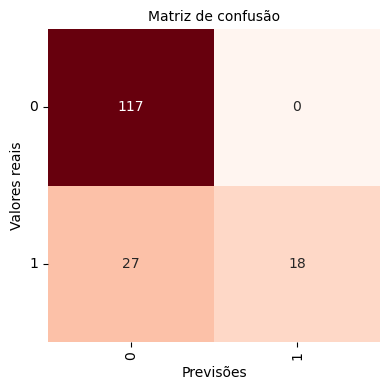

In [11]:
mlp_2 = MLPClassifier(
    verbose= False,
    max_iter=300, 
    activation='relu', 
    hidden_layer_sizes=(7,13),
    batch_size=16,
    beta_1=0.8,
    beta_2=0.9,
    solver='adam',
    early_stopping=True,
    n_iter_no_change=25
)
mlp_2.fit(X_train_norm.values, y_train)

y_pred = mlp_2.predict(X_test_norm.values)
get_accuracy(y_test, y_pred)
get_precision(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [12]:
grid["params"].iloc[2]

"{'activation': 'logistic', 'batch_size': 16, 'beta_1': 0.9, 'beta_2': 0.9, 'hidden_layer_sizes': (5, 15), 'max_iter': 500, 'n_iter_no_change': 25, 'solver': 'adam', 'verbose': False}"

ACURÁCIA: 0.9012
PRECISÃO: 0.9012


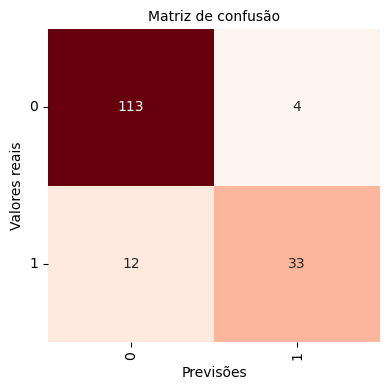

In [13]:
mlp_3 = MLPClassifier(
    verbose= False,
    max_iter=500, 
    activation='relu', 
    hidden_layer_sizes=(5,15),
    batch_size=16,
    beta_1=0.9,
    beta_2=0.9,
    solver='adam',
    early_stopping=True,
    n_iter_no_change=25
)
mlp_3.fit(X_train_norm.values, y_train)

y_pred = mlp_3.predict(X_test_norm.values)
get_accuracy(y_test, y_pred)
get_precision(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

## Salvando a melhor MLP

ACURÁCIA: 0.8996
PRECISÃO: 0.8996


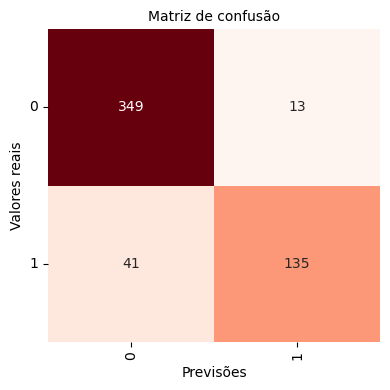

In [20]:
clf = mlp_3.fit(X.values, y)

y_pred = clf.predict(X.values)
get_accuracy(y, y_pred)
get_precision(y, y_pred)
plot_confusion_matrix(y, y_pred)

In [21]:
dump(clf, 'models/pcos-diagnosis-45-params.joblib')

['models/pcos-diagnosis-45-params.joblib']